***COVID 19 INDIA ANALYSIS***

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
df = pd.read_csv(r'C:\Users\hp\Downloads\diwali_sales_analysis\Diwali_Sales_Analysis_Using_Python-main\Diwali_Sales_Analysis_Using_Python-main\covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [92]:
df = df.rename(columns = {'State/UnionTerritory':'State','Cured':'Recovery'})
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovery,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [93]:
df.columns

Index(['Sno', 'Date', 'Time', 'State', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Recovery', 'Deaths', 'Confirmed'],
      dtype='object')

In [94]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State                       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Recovery                    0
Deaths                      0
Confirmed                   0
dtype: int64

In [95]:
df['Active'] = df['Confirmed'] - df['Recovery'] - df['Deaths']
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovery,Deaths,Confirmed,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3


In [96]:
df.drop(['Time', 'ConfirmedIndianNational','ConfirmedForeignNational'],axis =1)

,Sno,Date,State,Recovery,Deaths,Confirmed,Active
0,1,2020-01-30,Kerala,0,0,1,1
1,2,2020-01-31,Kerala,0,0,1,1
2,3,2020-02-01,Kerala,0,0,2,2
3,4,2020-02-02,Kerala,0,0,3,3
4,5,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...,...
18105,18106,2021-08-11,Telangana,638410,3831,650353,8112
18106,18107,2021-08-11,Tripura,77811,773,80660,2076
18107,18108,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,18109,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545


***DEATHS***

<AxesSubplot:xlabel='State', ylabel='Deaths'>

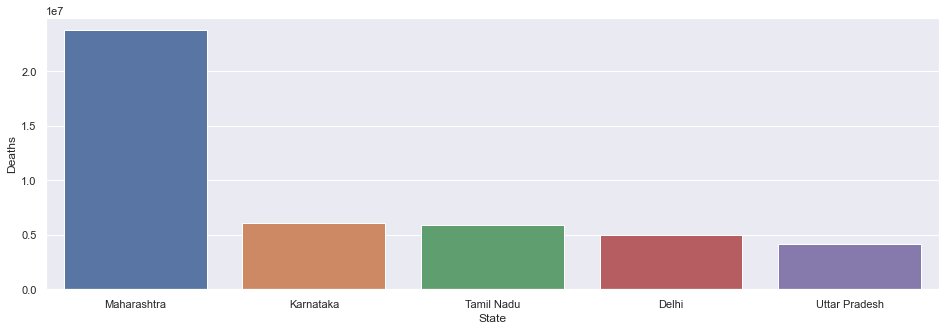

In [97]:
death_st = df.groupby(['State'], as_index=False)['Deaths'].sum().sort_values(by='Deaths', ascending=False).head(5)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x = 'State',y= 'Deaths' ,data = death_st)

**We see that Maharashtra has highest number of death cases followed by Karnataka, Tamil Nadu and Delhi respectively**

***ACTIVE***

<AxesSubplot:xlabel='State', ylabel='Active'>

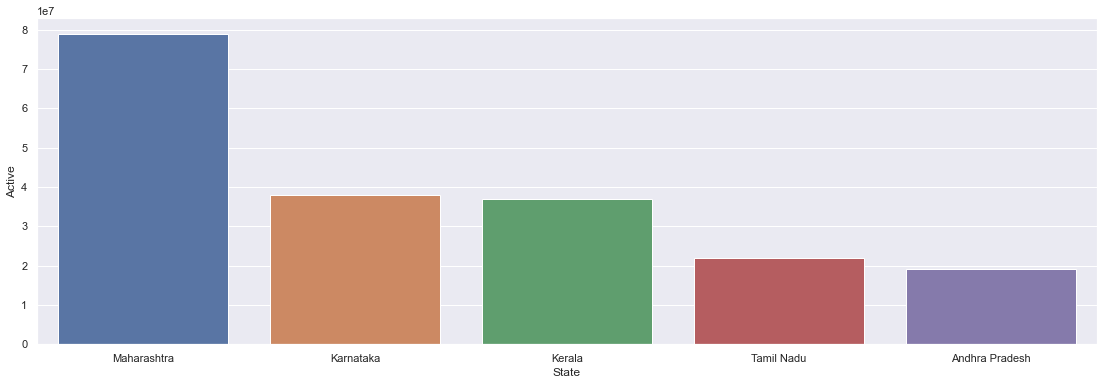

In [98]:
act_st = df.groupby(['State'], as_index = False)['Active'].sum().sort_values(by = ['Active'], ascending = False).head(5)
sns.set(rc = {'figure.figsize': (19,6)})
sns.barplot(x = 'State', y = 'Active', data = act_st)

**Here we see that states having currently actives cases are Maharashtra, Karnataka and Kerela**

***RECOVERY***

<AxesSubplot:xlabel='State', ylabel='Recovery'>

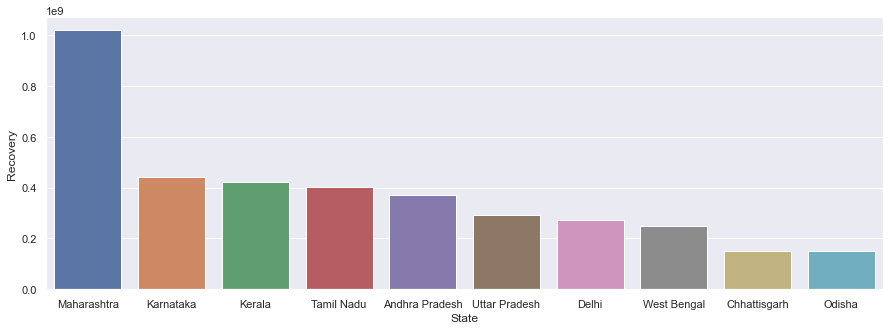

In [99]:
St_rec = df.groupby(['State'], as_index = False)['Recovery'].sum().sort_values(by = ['Recovery'], ascending = False).head(10)
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Recovery', data = St_rec)

**We conclude that inspite of Maharashtra, Karnataka and Kerela having most active cases ,all the top states are capable of having the fastest recovery rates with Delhi having least active cases compared to Andhra Pradesh, West Bengal and Chhattisgarh. Delhi has much better recovery case compared to all three states**

In [ ]:
***CONCLUSION***